# Chapter 6 - Model Complexity and Hyperparamters

In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:33: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjEx

       age  education  years_exp  compensation  python  r  sql  Q1_Male  \
587     25       18.0        4.0             0       1  0    1        1   
3065    22       16.0        1.0         10000       1  0    0        1   
8435    22       18.0        1.0             0       1  0    0        1   
3110    40       20.0        3.0        125000       1  0    1        0   
16372   45       12.0        5.0        100000       1  0    1        1   
...    ...        ...        ...           ...     ... ..  ...      ...   
16608   25       16.0        2.0         10000       0  0    1        1   
7325    18       16.0        1.0         30000       1  0    1        1   
21810   18       16.0        2.0             0       0  0    0        1   
4917    25       18.0        1.0        100000       1  0    1        1   
639     25       18.0        1.0         10000       1  0    0        0   

       Q1_Female  Q1_Prefer not to say  Q1_Prefer to self-describe  \
587            0             

In [2]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing
import xgboost as xgb
import dtreeviz
#also, must install graphviz for plotting to work with xgb

In [3]:
underfit = tree.DecisionTreeClassifier(max_depth=1)
X_train = kag_pl.fit_transform(kag_X_train)
underfit.fit(X_train, kag_y_train)
underfit.score(X_test, kag_y_test)

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

0.6243093922651933

In [5]:
hi_variance = tree.DecisionTreeClassifier(max_depth=None)
hi_variance.fit(X_train, kag_y_train)
hi_variance.score(X_test, kag_y_test)

0.6607734806629835

[Text(0.6610215900053023, 0.9761904761904762, 'r <= 0.5\ngini = 0.496\nsamples = 2110\nvalue = [1153, 957]'),
 Text(0.4040421195652174, 0.9285714285714286, 'major_cs <= 0.5\ngini = 0.493\nsamples = 1484\nvalue = [653, 831]'),
 Text(0.2001126723223754, 0.8809523809523809, 'Q3_United States of America <= 0.5\ngini = 0.49\nsamples = 718\nvalue = [410, 308]'),
 Text(0.08463679745493106, 0.8333333333333334, 'years_exp <= 0.5\ngini = 0.491\nsamples = 322\nvalue = [140, 182]'),
 Text(0.028844114528101802, 0.7857142857142857, 'education <= 17.0\ngini = 0.463\nsamples = 74\nvalue = [47, 27]'),
 Text(0.021208907741251327, 0.7380952380952381, 'major_stat <= 0.5\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.01951219512195122, 0.6904761904761905, 'age <= 27.5\ngini = 0.5\nsamples = 38\nvalue = [19, 19]'),
 Text(0.017815482502651112, 0.6428571428571429, 'compensation <= 55000.0\ngini = 0.498\nsamples = 36\nvalue = [17, 19]'),
 Text(0.01611876988335101, 0.5952380952380952, 'compensation <=

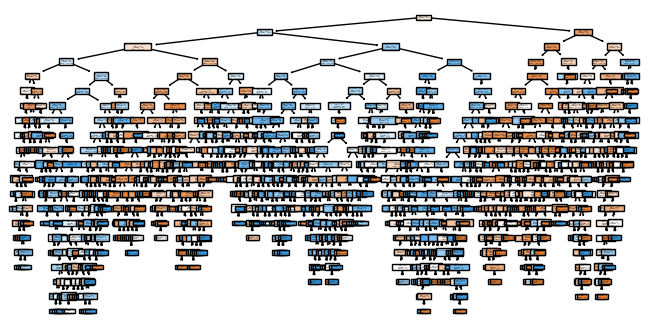

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
features = [c for c in X_train.columns]
tree.plot_tree(hi_variance, feature_names=features,filled=True)

[Text(0.5, 0.875, 'r <= 0.5\ngini = 0.496\nsamples = 2110\nvalue = [1153, 957]\nclass = Data Scientist'),
 Text(0.25, 0.625, 'major_cs <= 0.5\ngini = 0.493\nsamples = 1484\nvalue = [653, 831]\nclass = Software Engineer'),
 Text(0.125, 0.375, 'Q3_United States of America <= 0.5\ngini = 0.49\nsamples = 718\nvalue = [410, 308]\nclass = Data Scientist'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'years_exp <= 2.5\ngini = 0.433\nsamples = 766\nvalue = [243.0, 523.0]\nclass = Software Engineer'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'major_cs <= 0.5\ngini = 0.322\nsamples = 626\nvalue = [500.0, 126.0]\nclass = Data Scientist'),
 Text(0.625, 0.375, 'years_exp <= 22.5\ngini = 0.211\nsamples = 443\nvalue = [390, 53]\nclass = Data Scientist'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'years_exp <= 7.5\ngini = 0.48\nsamples = 

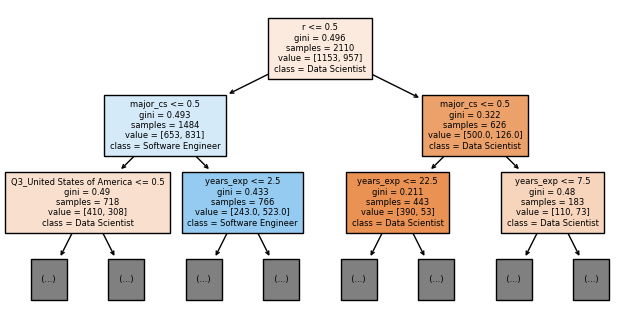

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
tree.plot_tree(hi_variance, feature_names=features, filled=True, class_names=hi_variance.classes_,max_depth=2, fontsize=6)